# Úkol - příprava dat, základní statistická analýza

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.

!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m      = počet řádků = 100
- x’s    = vstupní proměnná / features
- y’s    = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2)   = (4, 5, 3374, 85)
- y(2)   = 1 050 000

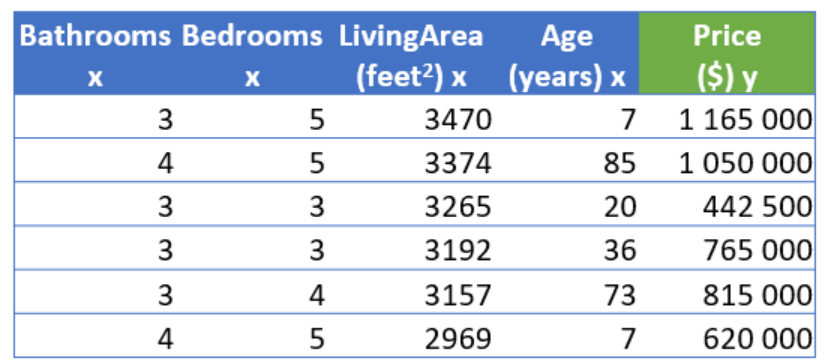

# Úkol

- Proveďte statistickou analýzu dat
- Vizualizujte data
- Vyberte vhodné proměnné pro lineární model
- Standardizujte data

## Čtení dat z CSV souboru

In [6]:
import pandas as pd 

In [7]:
data = pd.read_csv ("..\dataset\portland_filtered.csv",  sep=';')

In [8]:
data

,bathrooms,bedrooms,livingArea,age,price
0,3,5,3470,7,1165000
1,4,5,3374,85,1050000
2,3,3,3265,20,442500
3,3,3,3192,36,765000
4,3,4,3157,73,815000
...,...,...,...,...,...
95,1,3,838,72,250000
96,1,2,832,47,260000
97,1,2,812,46,220000
98,1,2,810,97,546500


## Základní charakteristiky data
- náhled dat
- zobrazení základních statistik (průměr, minimum, maximum, ...)
- kontrola NaN hodnot

In [9]:
print(data.describe())

        bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.25000  5.995312e+05
max      5.000000    6.000000  3470.000000  114.00000  1.165000e+06


In [10]:
print(data.isnull().sum())

bathrooms     0
bedrooms      0
livingArea    0
age           0
price         0
dtype: int64


## Distribuce dat
- grafy s distribucí dat
- boxplot grafy
- popsat, jaká jsou data (vychýlené hodnoty, ...)

In [11]:
import matplotlib.pyplot as plt

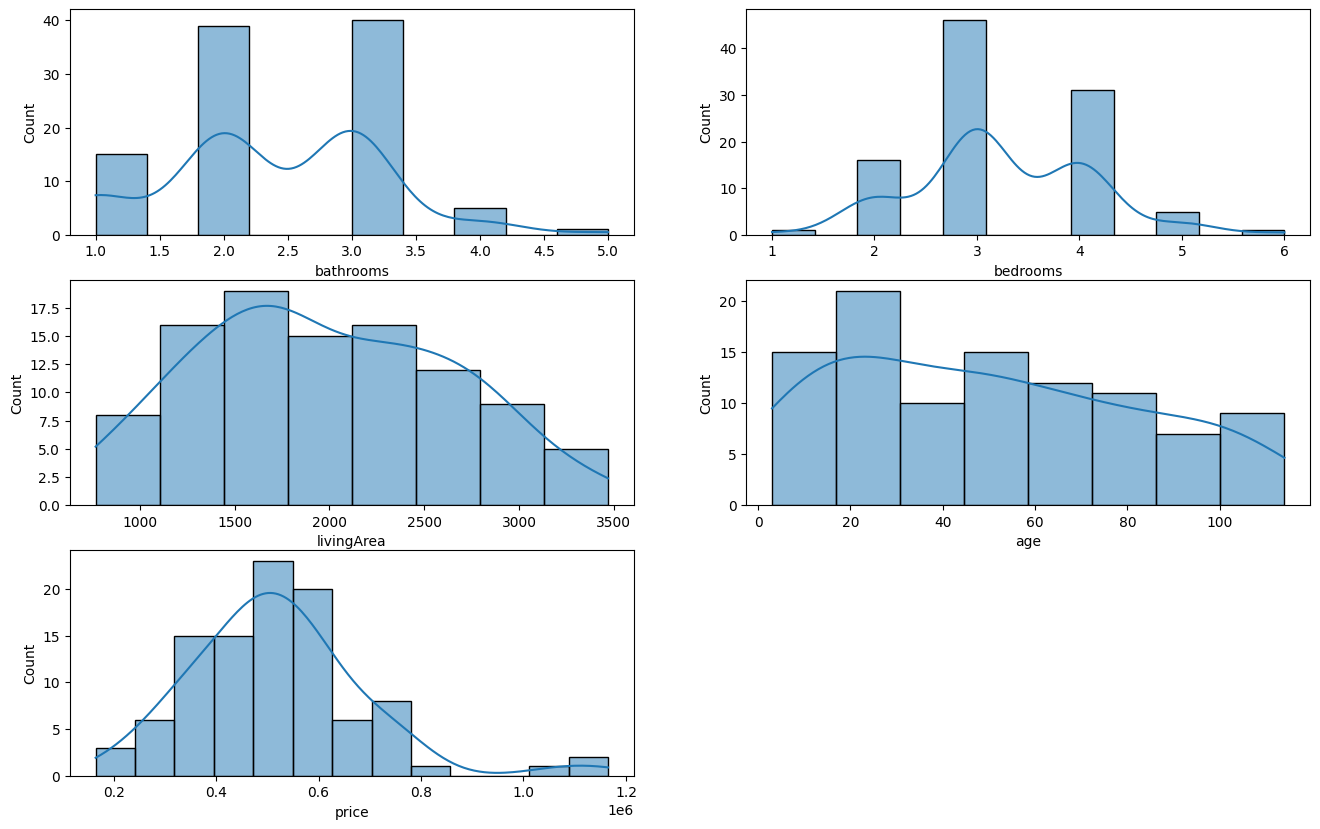

In [12]:
# zobrazení distribuce coločíselných hodnot s odhadem distribuční funkce
# kde=True, kernel density estimate line
pos = 1
fig = plt.figure(figsize=(16,24))
for i in data.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data[i], ax=ax, kde=True)

In [13]:
import seaborn as sns

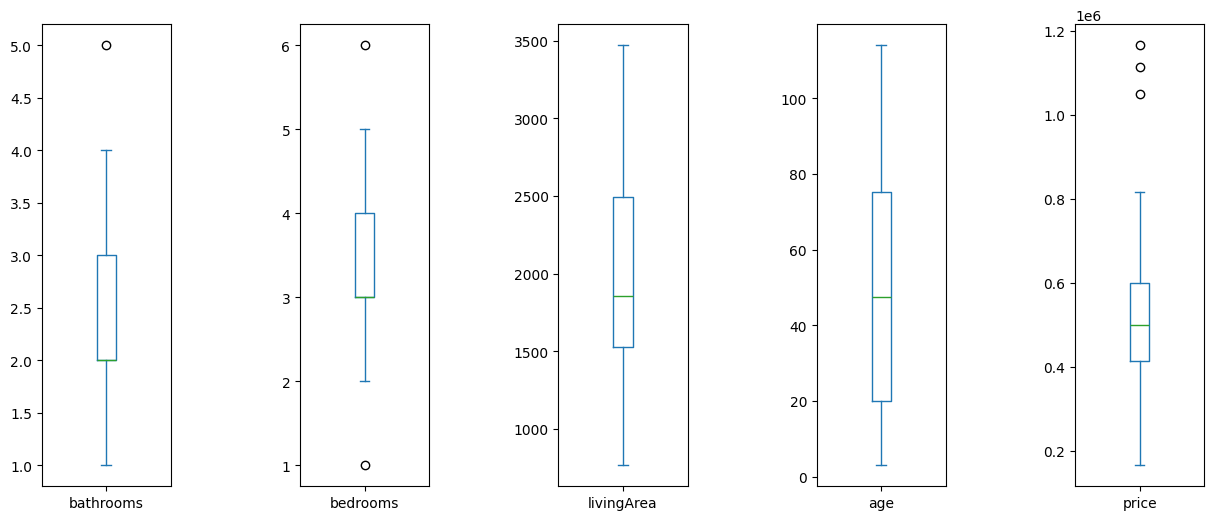

In [14]:

# stejné informace zobrazené v boxplotu
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()

## Vztahy mezi daty
- pairplot
- korelační tabulka
- Určit, které sloupce jsou lineárně závislé, vhodné pro vysvětlení price

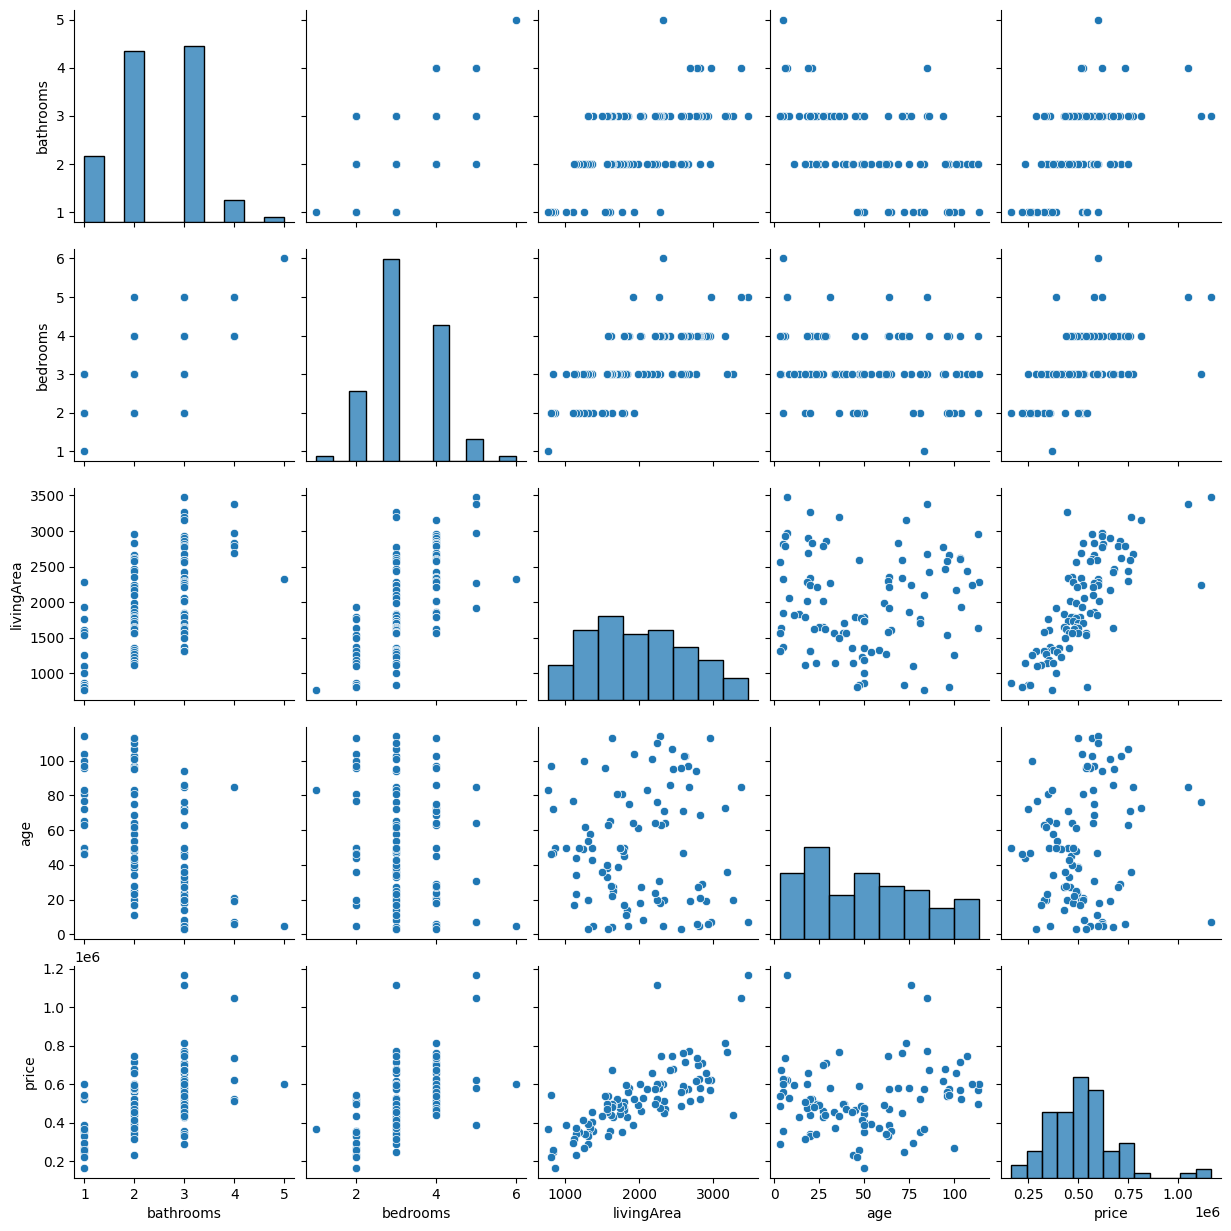

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Párový graf pro celý dataset
sns.pairplot(data)
plt.show()


            bathrooms  bedrooms  livingArea       age     price
bathrooms    1.000000  0.618132    0.566558 -0.536517  0.463856
bedrooms     0.618132  1.000000    0.641684 -0.224947  0.498934
livingArea   0.566558  0.641684    1.000000  0.019381  0.759973
age         -0.536517 -0.224947    0.019381  1.000000  0.114328
price        0.463856  0.498934    0.759973  0.114328  1.000000


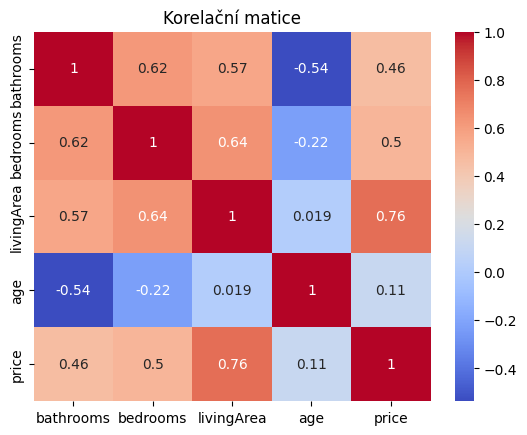

In [16]:
# Korelační tabulka
correlation_matrix = data.corr()

# Zobrazení korelační tabulky
print(correlation_matrix)

# Heatmapa korelací pro lepší vizualizaci
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelační matice')
plt.show()


In [17]:
# Korelace jednotlivých sloupců s 'price'
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_price)

#Hodnoty blízké 1 nebo -1 naznačují silnou lineární závislost. Hodnoty blízké 0 naznačují slabou nebo žádnou lineární závislost.


price         1.000000
livingArea    0.759973
bedrooms      0.498934
bathrooms     0.463856
age           0.114328
Name: price, dtype: float64


In [ ]:
# Párové grafy: Vizualizují vztahy mezi dvojicemi proměnných.

# Korelační tabulka: Kvantifikuje sílu lineárních vztahů mezi proměnnými.

# Identifikace závislostí: Korelace s price odhalí, které proměnné jsou vhodné pro její vysvětlení.

## Standardizace dat

Každá funkce má jinou střední, standardní odchylku.

Standardizační centrum a funkce měřítka.

důvody:
* zabránit tomu, aby některé funkce modelu dominovaly
* může pomoci rychleji konvergovat modely strojového učení
* může usnadnit interpretaci koeficientů modelu strojového učení

Výpočet:
* x_new = (x – střední hodnota) / směrodatná_odchylka
* průměr = součet (x) / počet (x)
* směrodatná_odchylka = sqrt( součet ( (x – průměr)^2 ) / počet (x))

- proveďte standardizaci sloupců použitelných pro linární regresi
- zobrazte rozložení původních a standardizovaných dat

In [18]:
data["age"].mean()

np.float64(49.88)

In [19]:
data["age"].std()

np.float64(32.77973012504385)

In [20]:
data['age_STD'] = (data['age'] - data['age'].mean()) / data['age'].std()
data['price_STD'] = (data['price'] - data['price'].mean()) / data['price'].std()

<Axes: xlabel='age_STD', ylabel='Count'>

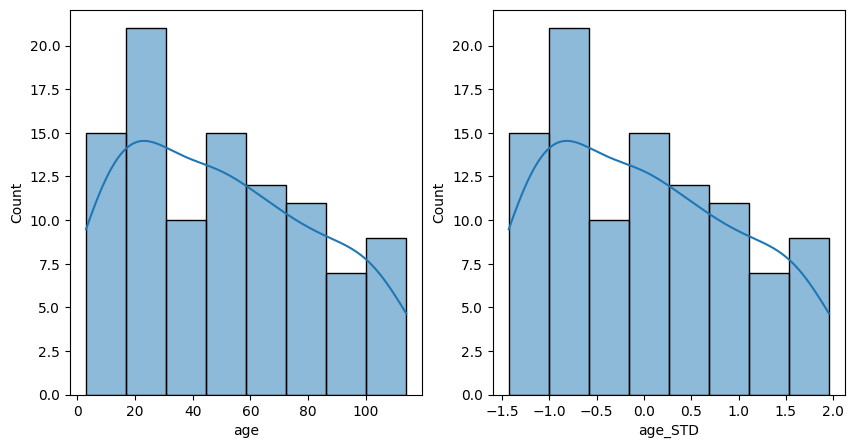

In [21]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)           # pole jednotlivých grafů - 2 vedle sebe
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(data['age'],ax=ax1, kde=True)
sns.histplot(data['age_STD'],ax=ax2, kde=True)

<Axes: xlabel='price_STD', ylabel='Count'>

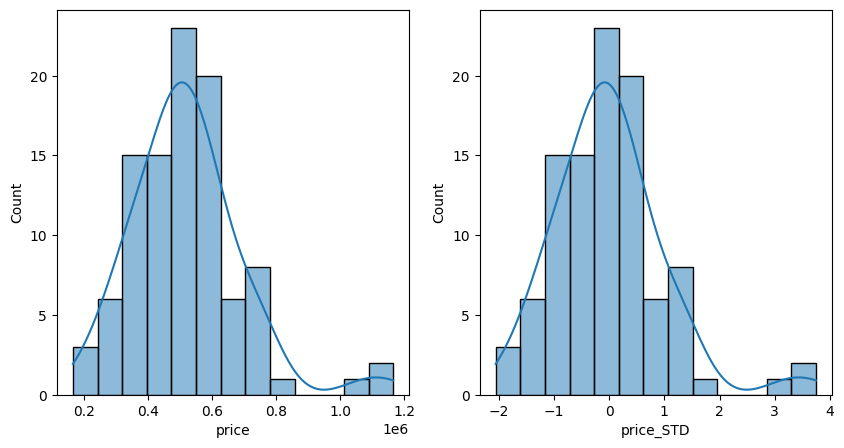

In [22]:
fig = plt.figure (figsize=(10, 5))
axes = fig.subplots (1, 2)           # pole jednotlivých grafů
ax1 = axes[0]
ax2 = axes[1]
sns.histplot(data['price'],ax=ax1, kde=True)
sns.histplot(data['price_STD'],ax=ax2, kde=True)